In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

df_final = pd.read_csv('transformed_log.csv')

print(df_final.columns)

Index(['case_id', 'duracao', 'caseType', 'diagnosis', 'speciality', 'state',
       'blocked', 'isCancelled', 'isClosed', 'at_BILLED',
       ...
       'STORNO->JOIN-PAT', 'STORNO->MANUAL', 'STORNO->REJECT',
       'STORNO->REOPEN', 'STORNO->SET STATUS', 'STORNO->STORNO',
       'ZDBC_BEHAN->BILLED', 'inicio', 'fim', 'duracao_segundos'],
      dtype='object', length=174)


In [21]:
# Selecionar colunas categóricas
categorical_cols = ['caseType', 'diagnosis', 'speciality', 'state', 'blocked', 'isCancelled', 'isClosed']

# One-hot encoding
X_categoricals = pd.get_dummies(df_final[categorical_cols])

# Selecionar colunas de atividades/transições
X_activities = df_final[[c for c in df_final.columns if c.startswith('at_') or '->' in c]]

# Combinar todas em X
X = pd.concat([X_activities, X_categoricals], axis=1)

# Target
y = df_final['duracao']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [11]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Alta       0.68      0.64      0.66      7987
       Baixa       0.76      0.32      0.45      7519
       Média       0.48      0.79      0.60      7467

    accuracy                           0.59     22973
   macro avg       0.64      0.58      0.57     22973
weighted avg       0.64      0.59      0.57     22973



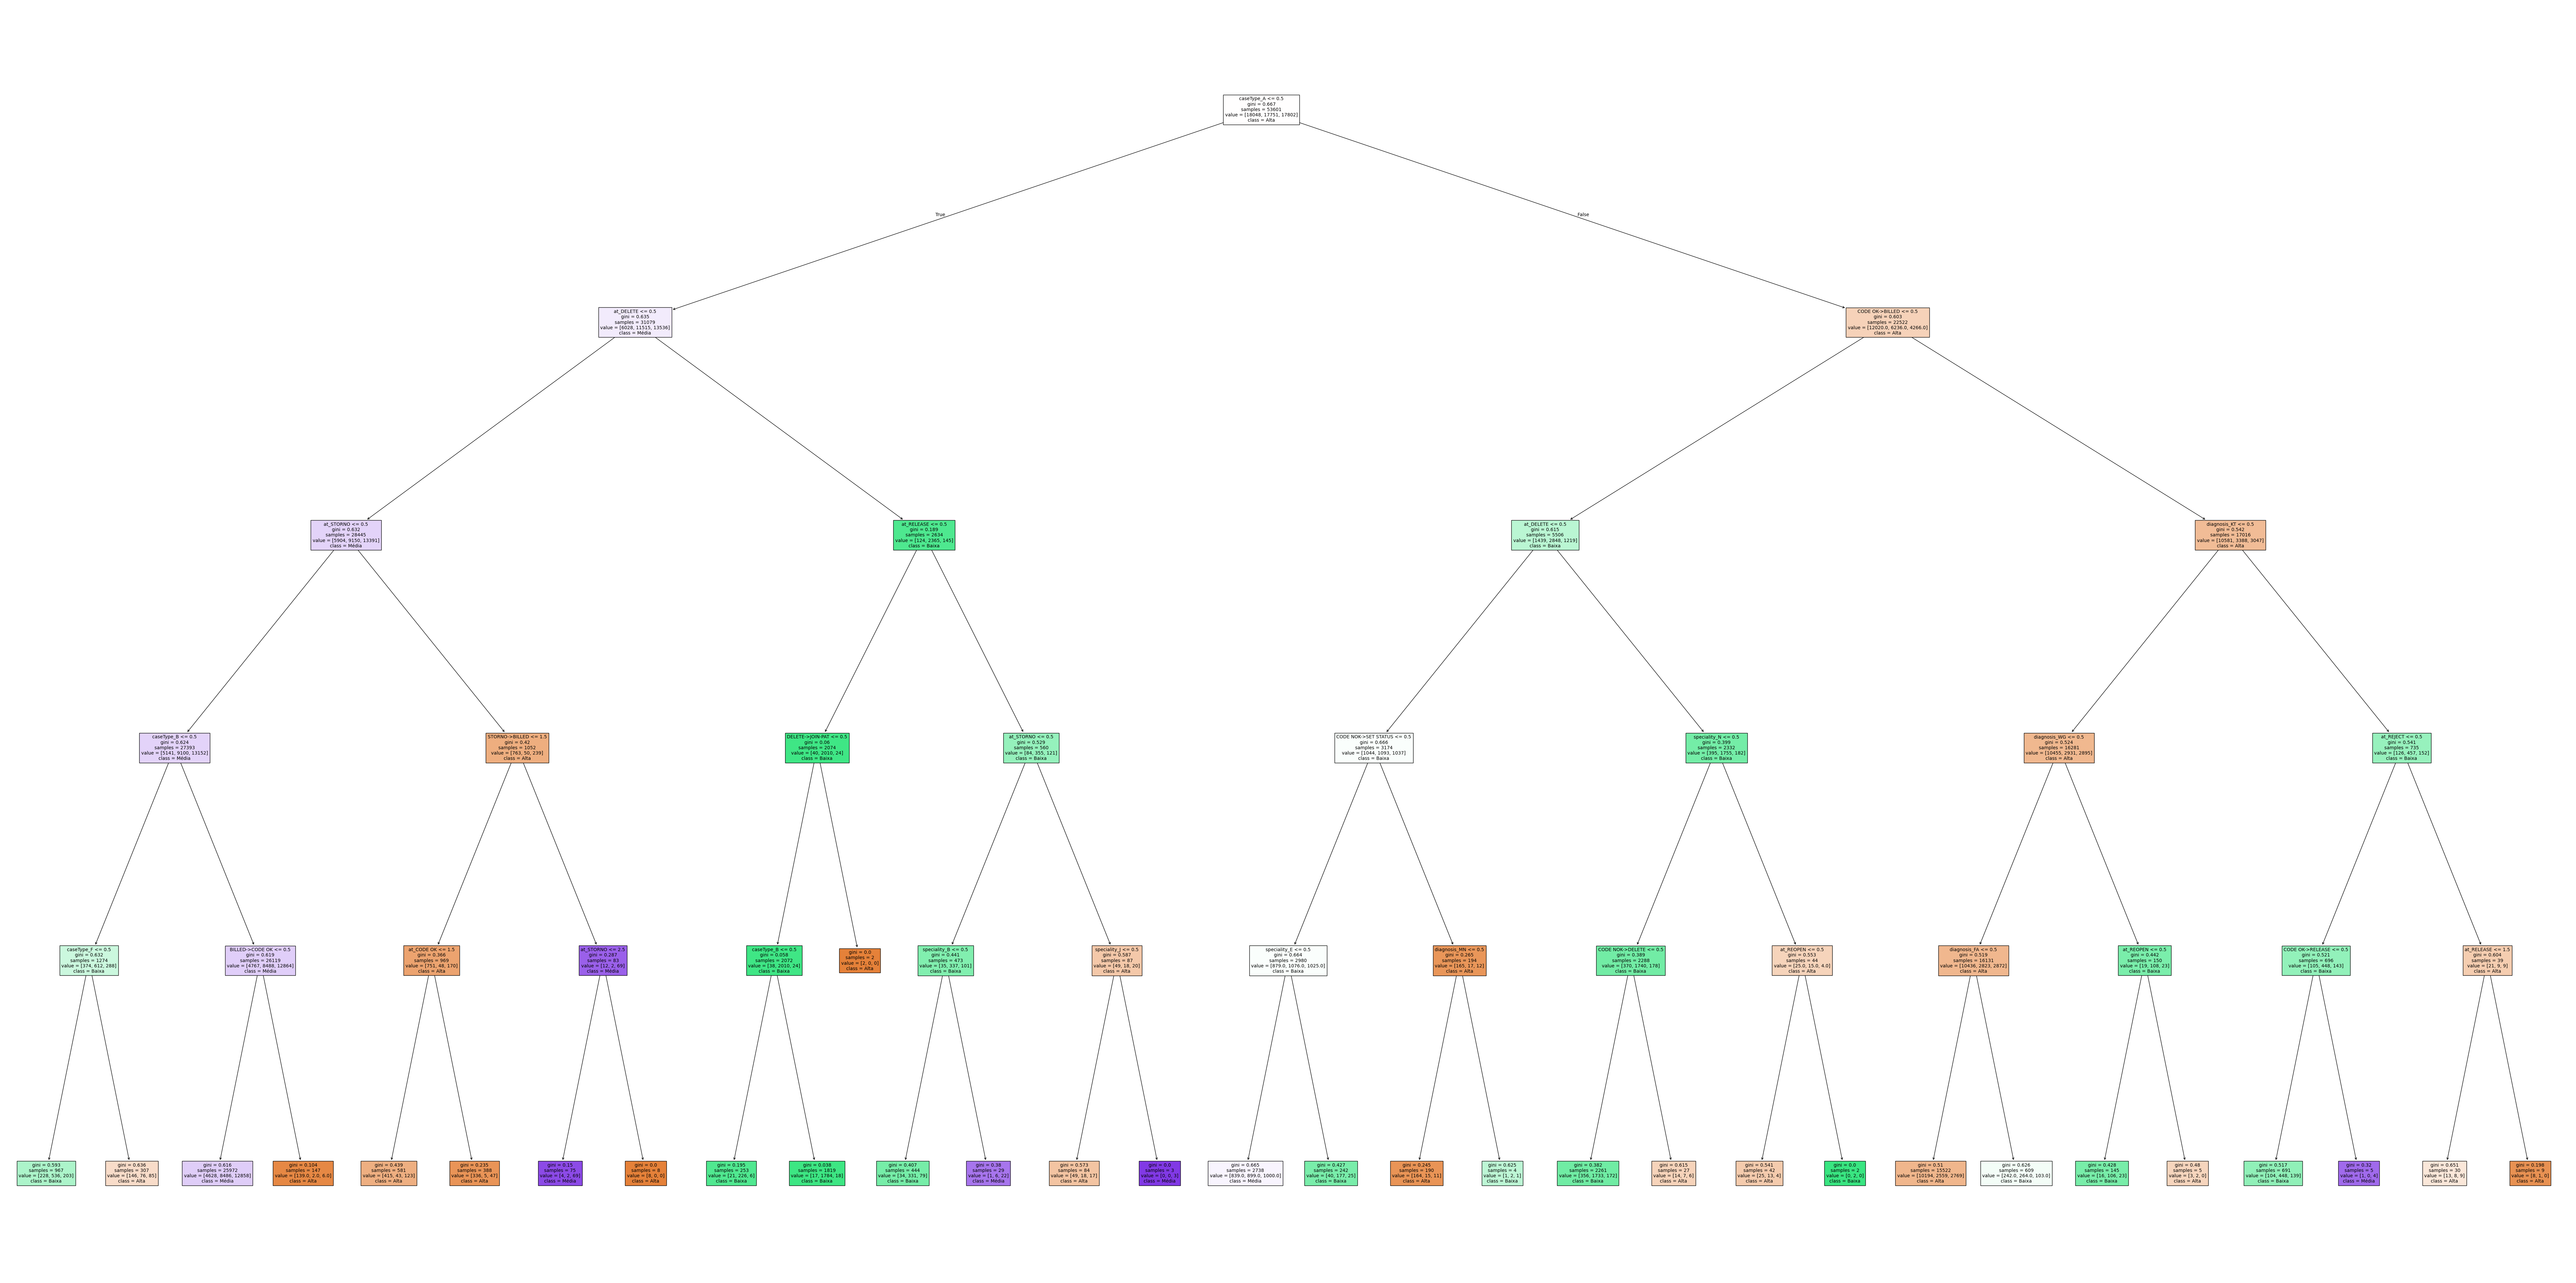

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(100,50))
plot_tree(
    dt_model,
    feature_names=X_train.columns,
    class_names=dt_model.classes_,
    filled=True,
    fontsize=10
)
plt.show()


In [ ]:
import pandas as pd

importancia = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importancia.head(20))




caseType_A              0.364928
at_DELETE               0.245090
CODE OK->BILLED         0.146567
at_STORNO               0.073916
diagnosis_KT            0.044414
caseType_B              0.020193
BILLED->CODE OK         0.019749
diagnosis_WG            0.012775
CODE NOK->SET STATUS    0.012755
diagnosis_FA            0.012366
at_RELEASE              0.011759
STORNO->BILLED          0.009578
speciality_E            0.008440
caseType_F              0.005500
speciality_B            0.002590
speciality_N            0.002229
at_REJECT               0.001795
CODE NOK->DELETE        0.001650
at_CODE OK              0.001230
CODE OK->RELEASE        0.000587
dtype: float64


In [20]:
print(y.value_counts())


duracao
Alta     26035
Baixa    25270
Média    25269
Name: count, dtype: int64
